In [ ]:
#BUI MINH QUANG 20214925


(256, 256)
(256, 256)


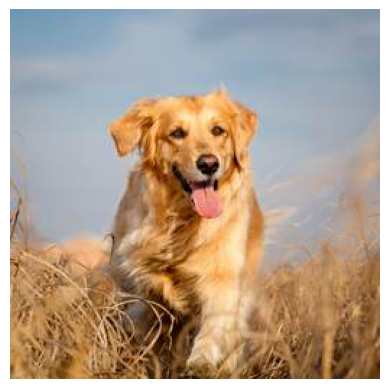

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Input image path
input_path = "data/img_0.jpg"

# Open and read the image
image = Image.open(input_path)
print(image.size)
new_size = (256,256)
image = image.resize(new_size)
print(image.size)
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()


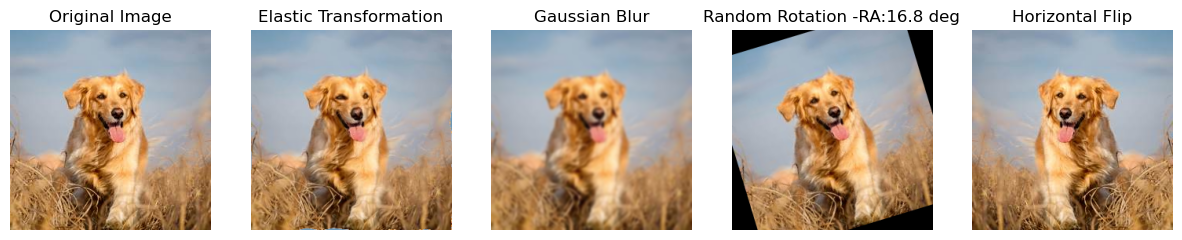

In [30]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter
import random
import matplotlib.pyplot as plt

# Load the image
input_path = "data/img_0.jpg"
image = cv2.imread(input_path)

# Create a list to store augmented images
augmented_images = []
titles = []

# Original image
augmented_images.append(image)
titles.append("Original Image")

# Elastic transformation parameters -4
elastic_alpha = 50  # Elastic distortion coefficient
elastic_sigma = 6  # Elastic distortion Gaussian filter standard deviation
# Apply elastic transformation 
height, width, _ = image.shape
random_displacement_x = elastic_alpha * gaussian_filter((np.random.rand(height, width) * 2 - 1), elastic_sigma, mode="constant", cval=0)
random_displacement_y = elastic_alpha * gaussian_filter((np.random.rand(height, width) * 2 - 1), elastic_sigma, mode="constant", cval=0)
grid_x, grid_y = np.meshgrid(np.arange(width), np.arange(height))
remapped_x = cv2.remap(grid_x.astype(np.float32), (grid_x + random_displacement_x).astype(np.float32), (grid_y + random_displacement_y).astype(np.float32), interpolation=cv2.INTER_LINEAR)
remapped_y = cv2.remap(grid_y.astype(np.float32), (grid_x + random_displacement_x).astype(np.float32), (grid_y + random_displacement_y).astype(np.float32), interpolation=cv2.INTER_LINEAR)
distorted_image = cv2.remap(image, remapped_x, remapped_y, interpolation=cv2.INTER_LINEAR)
augmented_images.append(distorted_image)
titles.append("Elastic Transformation")

# Apply Gaussian blur -9
blurred_image = cv2.GaussianBlur(image, (7, 7),0)
augmented_images.append(blurred_image)
titles.append("Gaussian Blur")

# Random angle rotation -2
rotation_angle = random.uniform(-30, 30)  # Rotate between -30 to 30 degrees
M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), rotation_angle, 1)
rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
augmented_images.append(rotated_image)
titles.append("Random Rotation" + " -RA:" + str(round(rotation_angle,2)) + " deg")



# Horizontal flip  -5

augmented_images.append(cv2.flip(image, 1))
titles.append("Horizontal Flip")





# Display the original and augmented images using plt
plt.figure(figsize=(15, 5))

for i, augmented_image in enumerate(augmented_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.show()
